# ISEL - CPS 
## Semestre 2020/21
# <br>
###  <center> Trabalho Prático </center>
# </br>

Trabalho realizado por:
* Aurizando Silva, <b> 47461 </b>
* Diana Silva, numero <b> 46308 </b>

data: 06/01/2021

A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

Este trabalho foca os blocos Deteção e Correção de erros.

Considere as funções já criadas em Python das aulas anteriores.

Considere a imagem fornecida e meça a SNR e o BER com e sem correção de erros.
Visualize a imagem no receptor e comente os resultados.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def potencia(sinal):
    '''
    Calcular a potencia do sinal
    '''
    return np.sum( (sinal ** 2) / len(sinal))

def snr_uniforme(R, Potencia, Vmax):
    """
    Aplica formula de calculo do SNR do Quantificador Uniforme
    
    R: Numero de bits
    P: Potencia do sinal
    Vmax: Voltagem máxima do sinal
    """
    return 6.02 * R + 10 * np.log10(3 * (Potencia / Vmax**2))

def ber_pratico(sinal_1,sinal_2):
    bits_errados = np.sum(np.logical_xor(sinal_1, sinal_2))
    ber = bits_errados / len(sinal_1)
    return ber;

In [3]:
def Quantific(R,Vmax,Qtype):
    # resposta
    L = 2 ** R
    delta = (2 * Vmax)/L
    delta_metade = delta / 2
    pos = (L-1)*delta_metade
  
    if(Qtype == "midtread"): # midtread
        Vq = np.arange(-pos, pos+delta, delta)
        Iq = np.arange(-Vmax, Vmax+delta, delta)
        
        for i in range(len(Vq)):
            Vq[i] = Vq[i] + delta_metade
            
        for i in range(len(Iq)):
            
            if(Iq[i] == Vmax):
                Iq[i] = Iq[i]
            else:
                Iq[i] = Iq[i]+delta_metade
        
    if (Qtype == "midrise"):
        Vq = np.arange(-pos, pos + delta,delta)
        Iq = np.arange(-Vmax  ,Vmax + delta ,delta)
    return Vq, Iq


def Quantificador(x,Vq,Iq):
    pos = np.digitize(x,Iq)
    resultado = Vq[pos-1]          
    return resultado

In [22]:
def Codific(arr_signal_quantized,R):
    
    representation = []
    arr_signal_quantized = np.int_(arr_signal_quantized)
            
    for i in range(len(arr_signal_quantized)):
        if(arr_signal_quantized[i] < 0):
            valor_int = arr_signal_quantized[i] * -1
        else:
            valor_int = arr_signal_quantized[i]
            
        binary = bin(valor_int).replace("0b", "")
        representation.append(binary)

    arr_binary = []
    for y in range (len(representation)):
        binary_to_int = int(representation[y])

        for z in range (R):
            arr_binary.append(binary_to_int//pow(10,R-z - 1)%10)
                
    return arr_binary

def Descodific(arr_binary,R):
    #resposta
    posicao = 0
    arr_aux = []
    arr_final_aux = []
    
    for i in range(len(arr_binary)):
        conversao = str(arr_binary[i])
        arr_aux.append(conversao)
        
    for j in range(len(arr_binary)):
        if (j % R == 0):
            arr_final_aux.append(arr_aux[j])
        else:
            if (len(arr_final_aux[posicao]) == R):
                posicao = posicao + 1
            arr_final_aux[posicao] += arr_aux[i]
    
    arr_descodificado = []
    for z in range(len(arr_final_aux)):
        binario  = arr_final_aux[z]
        inteiro = int(binario, 2)
        arr_descodificado.append(inteiro)

    return arr_descodificado 

In [23]:
def Hamming_7_4(arr_bits):
    
    for i in range(5):
        if ((len(arr_bits) % 4) != 0):
            arr_bits.pop()
    
    
    duracao_final = int(len(arr_bits) * 7 / 4)
    
    
    array_bits_final = [0] * duracao_final
    
    iteracoes = int(len(arr_bits) / 4)
    
    
    index = 0
    index_final = 0
    
    for i in range(iteracoes):
       
       
        arr = []
        m1 = arr_bits[index]
        m2 = arr_bits[index + 1]
        m3 = arr_bits[index + 2]
        m4 = arr_bits[index + 3]

        x1 = np.bitwise_xor(np.bitwise_xor(m1, m3), m4)
        x2 = np.bitwise_xor(np.bitwise_xor(m1, m2), m4)
        x3 = np.bitwise_xor(np.bitwise_xor(m1, m2), m3)

        arr = [m1,m2,m3,x3,m4,x2,x1]
        
        for j in range(7):  
            array_bits_final[index_final+ j] = arr[j]
            
        index = index + 4
        
        index_final = index_final + 7
        
    return array_bits_final


def Detetor(arr_binary):
    
    duracao_final = int(len(arr_binary) / 7 * 4)
      
    array_bits_final = [0] * duracao_final
    
    iteracoes = int(len(arr_binary) / 7)
    
    index = 0
    index_aux = 0
    for i in range(iteracoes):
        arr = []
        m4 = arr_binary[index + 4]
        m3 = arr_binary[index + 2]
        m2 = arr_binary[index + 1]
        x3 = arr_binary[index + 3]
        m1 = arr_binary[index]
        x2 = arr_binary[index + 5]
        x1 = arr_binary[index + 6]
        p1 = np.bitwise_xor(np.bitwise_xor(m1, m3), m4)
        p2 = np.bitwise_xor(np.bitwise_xor(m1, m2), m4)
        p3 = np.bitwise_xor(np.bitwise_xor(m1, m2), m3)
        b1 = str((x1 + p1) % 2)
        b2 = str((x2 + p2) % 2)
        b3 = str((x3 + p3) % 2) 
        
        if( b1 == b2 == b3):  

            arr = [m1,m2,m3,m4]
        else: 

            arr = [m1,m2,m3,x3,m4,x2,x1]
            erro = b3 + b2 + b1
            erro_index = 7 - int(erro, 2) 
                        
            if(arr[erro_index]==1):
                
                arr[erro_index] = 0
            elif(arr[erro_index] == 0):
                arr[erro_index] = 1
                
            arr = [arr[0],arr[1],arr[2],arr[4]]
            
        for i in range(4):
            array_bits_final[index_aux] = arr[i]
            index_aux = index_aux + 1
        index = index + 7
        
        
    return array_bits_final

In [24]:
def BER_pratico(arr_bin_tx, arr_bin_rx):
    # resposta
    dur = len(arr_bin_rx)
    contador_erro = 0
    for i in range(dur):
        if(arr_bin_tx[i] != arr_bin_rx[i]):
            contador_erro += 1;
    BER_pratico = contador_erro / dur
    return BER_pratico

x = [0, 1, 1, 0, 0, 0, 1]
y = [0, 0, 1, 0, 1, 0, 1]

BER_pratico(x,y)

0.2857142857142857

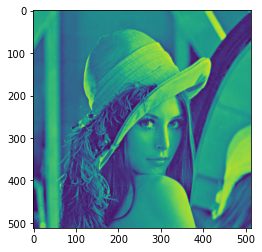

In [25]:
#Resposta:
from PIL import Image

im = Image.open("lena_gray.png")
data = np.asarray(im)

#SNR
#snr = SNRTeorica(data, 1, 3)
#print("SNR = {}".format(snr))

plt.imshow(im)
plt.show()
#im.show()

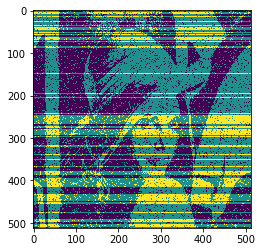

In [27]:
R = 8
m = 0
im = Image.open("lena_gray.png")
x_im = np.asarray(im)
Vmaxs = []
for i in range(len(x_im)):
    Vmax = np.max(x_im[i])
    Vmaxs.append(Vmax)
Vmax_definido = max(Vmaxs) + 1

imagem_new = []
a = []
b = []


for i in range(len(x_im)):
    Vmax = np.max(x_im[i])
    Vq,Iq = Quantific(R, Vmax_definido,"midrise")
    xq = Quantificador(x_im[i],Vq,Iq)
    c_imagem = Codific(xq,8)
    imagem_hamming = Hamming_7_4(c_imagem)
    BERt = 0.1
    y = 1 * np.logical_xor( imagem_hamming, np.random.binomial( 1, BERt, len(imagem_hamming) ) )
    y_1 = Detetor(y)
    
    Y_d = Descodific(y_1,8)
    ber_antes = BER_pratico(imagem_hamming,y)
    ber_depois = BER_pratico(c_imagem,Y_d)
    a.append(ber_antes)
    b.append(ber_depois)
    imagem_new.append(Y_d)
    
plt.imshow(imagem_new, interpolation='nearest')
plt.show()
    

Admita que pretende codificar a imagem fornecida para o trabalho com controle de erros implementado e guardar esta num ficheiro. 
Para o efeito deve produzir um cabeçalho (Header) com as especificações que considere pertinentes como requisito para a transmissão.


resposta

![fig_trab](Header.png)